In [40]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage import exposure

In [8]:
path_reference=r"C:\Users\guest\Downloads\archive (1)\data\messi5.jpg"

In [9]:
path_org=r"C:\Users\guest\Downloads\archive (1)\data\ellipses.jpg"

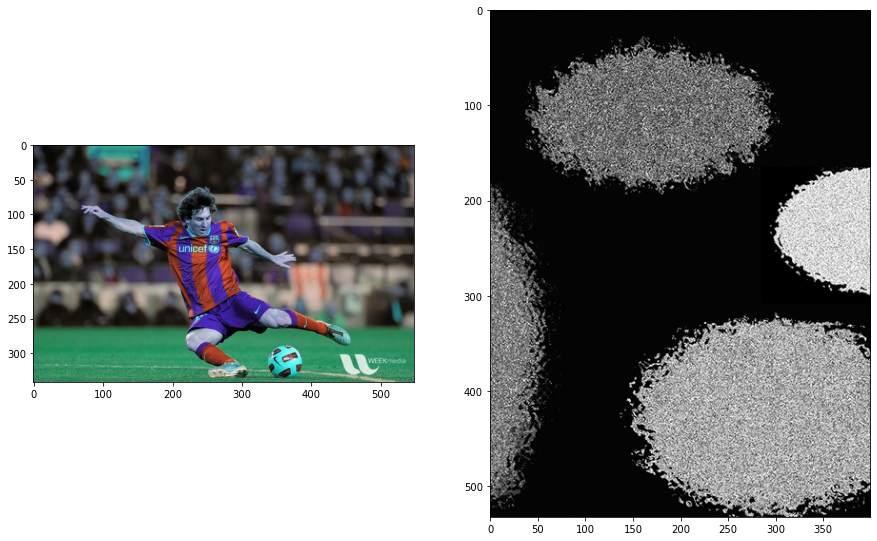

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15, 15))

# Display the first image
ax1.imshow(cv2.imread(path_reference))

# Display the second image
ax2.imshow(cv2.imread(path_org))

# Show the plot
plt.show()

In [25]:
resized_org= cv2.resize(cv2.imread(path_reference), (300, 300)) 
resized_reference = cv2.resize(cv2.imread(path_org), (300, 300))

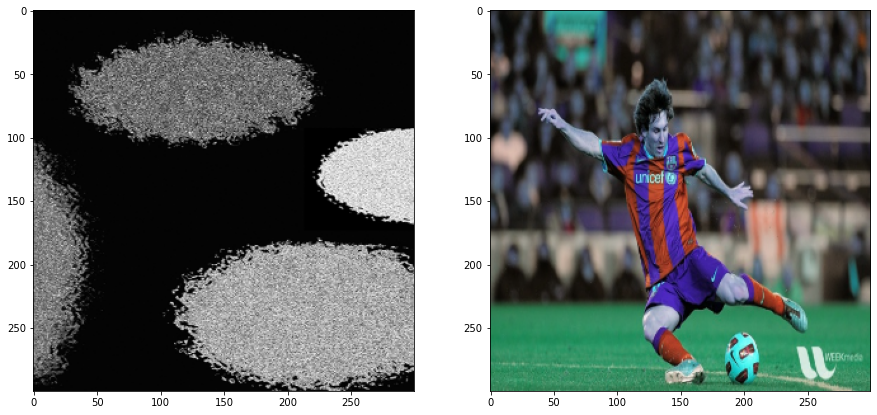

In [26]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15, 15))

# Display the first image
ax1.imshow(resized_reference)

# Display the second image
ax2.imshow(resized_org)

# Show the plot
plt.show()

In [27]:
resized_reference.shape,resized_org.shape          

((300, 300, 3), (300, 300, 3))

In [28]:
r2,g2,b2=cv2.split(resized_reference)
r1,g1,b1=cv2.split(resized_org)

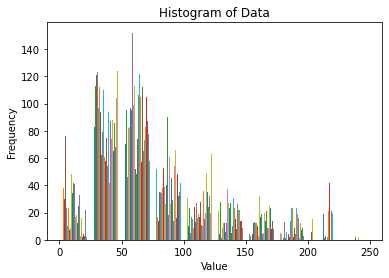

In [29]:
plt.hist(r1)
 

# Set the x-axis and y-axis labels
plt.xlabel("Value")
plt.ylabel("Frequency")

# Set the title of the histogram
plt.title("Histogram of Data")

# Show the plot
plt.show()

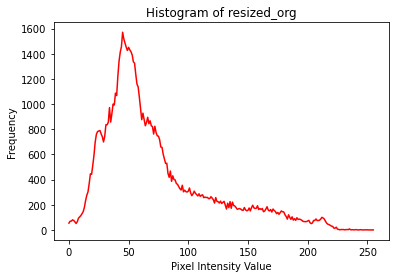

In [34]:
hist = cv2.calcHist([r1], [0], None, [256], [0, 256])
plt.plot(hist, color='r', linestyle='solid')

# Set the x-axis and y-axis labels
plt.xlabel("Pixel Intensity Value")
plt.ylabel("Frequency")

# Set the title of the histogram
plt.title("Histogram of resized_org")

# Show the plot
plt.show()

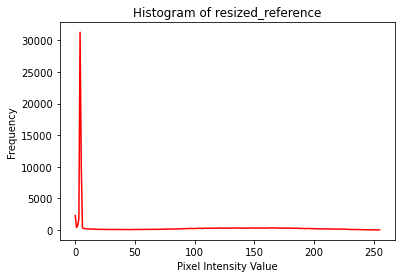

In [33]:
hist = cv2.calcHist([r2], [0], None, [256], [0, 256])
plt.plot(hist, color='r', linestyle='solid')

# Set the x-axis and y-axis labels
plt.xlabel("Pixel Intensity Value")
plt.ylabel("Frequency")

# Set the title of the histogram
plt.title("Histogram of resized_reference")

# Show the plot
plt.show()

## LETS MATCH HISTOGRAM

In [41]:
matched_img = exposure.match_histograms(r1, r2, multichannel=False)

C:\Users\guest\AppData\Local\Temp\ipykernel_5664\3665477298.py:1: FutureWarning: `multichannel` is a deprecated argument name for `match_histograms`. It will be removed in version 1.0. Please use `channel_axis` instead.
  matched_img = exposure.match_histograms(r1, r2, multichannel=False)


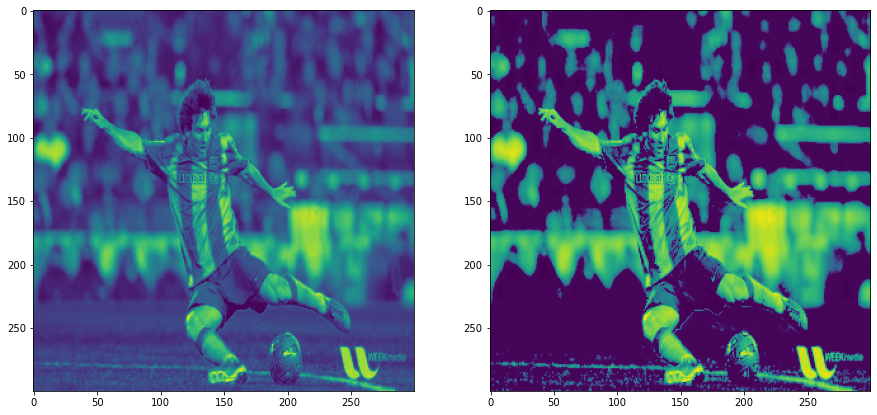

In [50]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15, 15))
ax1.imshow(r1)
ax2.imshow(matched_img)

# Show the plot
plt.show()

In [53]:
hist1, _ = np.histogram(r1, bins=256, range=[0, 256])
hist2, _ = np.histogram(matched_img, bins=256, range=[0, 256])


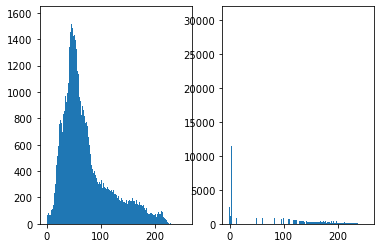

In [54]:
fig, ax = plt.subplots(1, 2)

# Plot the first histogram
ax[0].bar(range(len(hist1)), hist1, width=1)

# Plot the second histogram
ax[1].bar(range(len(hist2)), hist2, width=1)

# Show the plot
plt.show()